In [157]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score

In [2]:
df = pd.read_csv(r"C:\Users\gokul\OneDrive\Pictures\VGR\AISECT_AIML_test\carpricedata.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [4]:
df.shape

(8128, 12)

In [5]:
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [7]:
df['mileage(km/ltr/kg)'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
8123    False
8124    False
8125    False
8126    False
8127    False
Name: mileage(km/ltr/kg), Length: 8128, dtype: bool

In [8]:
df['engine'].min()

np.float64(624.0)

In [9]:
df['year'].unique()

array([2014, 2006, 2010, 2007, 2017, 2001, 2011, 2013, 2005, 2009, 2016,
       2012, 2002, 2015, 2018, 2003, 2019, 2008, 2020, 1999, 2000, 1983,
       2004, 1996, 1994, 1995, 1998, 1997, 1991])

In [10]:
#df['km_driven'].unique()

In [11]:
df['km_driven'].min()
#Here we found Outlier in km_driven' as 1

np.int64(1)

In [12]:
df['km_driven'].max()
#Here we found Outlier in km_driven' as 2360457

np.int64(2360457)

In [13]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [14]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [15]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [16]:
# changing 'max_power' dtype Object to float
df['max_power'] = df['max_power'].astype(str).str.strip()
df['max_power'] = df['max_power'].replace(r'^\s*$', np.nan, regex=True)
df['max_power'] = df['max_power'].replace(r'[\$,]', '', regex=True) 
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')

In [ ]:
#Converts the max_power column values to strings (useful if some values are stored as numbers, NaN, or objects).
#str.strip(): Removes any leading and trailing whitespace from the values.
#\s* → Any number of whitespace character
# Replaces them with NaN (missing values) using np.nan.
# r'[\$,]' This removes any dollar signs or commas from numeric values.
# Converts the cleaned string values into numbers 
# If conversion fails (e.g., non-numeric values like "unknown"), it replaces them with NaN

In [17]:
df['max_power'].isnull().sum()

np.int64(216)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7912 non-null   float64
 11  seats               7907 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [19]:
df['name'].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'],
      shape=(2058,), dtype=object)

In [20]:
df['max_power'] = df['max_power'].fillna(df['max_power'].mean())

In [21]:
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power               0
seats                 221
dtype: int64

In [22]:
df['mileage(km/ltr/kg)'] = df['mileage(km/ltr/kg)'].fillna(df['mileage(km/ltr/kg)'].mean())

In [23]:
df['engine']

0       1248.0
1       1498.0
2       1497.0
3       1396.0
4       1298.0
         ...  
8123    1197.0
8124    1493.0
8125    1248.0
8126    1396.0
8127    1396.0
Name: engine, Length: 8128, dtype: float64

In [24]:
imputer = SimpleImputer(strategy = 'median')
df[['engine']] = imputer.fit_transform(df[['engine']])

In [25]:
df['seats'].unique()

array([ 5.,  4., nan,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [26]:
impute_2 = SimpleImputer(strategy = 'mean')
df[['seats']] = impute_2.fit_transform(df[['seats']])

In [27]:
df['seats'].isnull().sum()

np.int64(0)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  8128 non-null   float64
 9   engine              8128 non-null   float64
 10  max_power           8128 non-null   float64
 11  seats               8128 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [29]:
df.isnull().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

In [30]:
df['year'].min()

np.int64(1983)

In [31]:
df['year'].max()

np.int64(2020)

In [32]:
df['year'].unique()

array([2014, 2006, 2010, 2007, 2017, 2001, 2011, 2013, 2005, 2009, 2016,
       2012, 2002, 2015, 2018, 2003, 2019, 2008, 2020, 1999, 2000, 1983,
       2004, 1996, 1994, 1995, 1998, 1997, 1991])

In [33]:
#.loc[] function in pandas is used to access and modify specific rows and columns based on conditions

In [36]:
#year_class = pd.Series(['Old','Mid','New'], dtype = 'category')
#year_class = ['Old', 'Mid', 'New']
#df['year_class'] = pd.Categorical(df['year_class'], categories=year_class, ordered=True)

#df.loc[df['year'] <= 1999, 'year_class'] = year_class[0]
#df.loc[(df['year'] >= 2000) & df['year'] <= 2010, 'year_class'] = year_class[1]
#df.loc[df['year'] >= 2011 , 'year_class'] = year_class[2]

In [37]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  8128 non-null   float64
 9   engine              8128 non-null   float64
 10  max_power           8128 non-null   float64
 11  seats               8128 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [40]:
#df['year_class'].unique()

In [41]:
df.isnull().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

In [44]:
#df['year_class'].value_counts()

In [45]:
df['owner'].value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

In [47]:
df['year'].value_counts()

year
2017    1018
2016     859
2018     807
2015     776
2013     670
2012     651
2014     621
2011     592
2019     583
2010     394
2009     246
2008     214
2007     183
2006     124
2005      97
2020      74
2004      62
2003      49
2002      27
2000      22
1999      18
1997      11
2001      10
1998      10
1996       3
1994       3
1995       2
1983       1
1991       1
Name: count, dtype: int64

In [48]:
df['seller_type'].value_counts()

seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64

In [49]:
df['transmission'].value_counts()

transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64

In [50]:
df['fuel'].value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

In [51]:
df['fuel'].isnull().sum()

np.int64(0)

In [52]:
df.shape

(8128, 12)

In [53]:
df = df[~df['fuel'].isin(['CNG', 'LPG'])]

In [54]:
df.shape

(8033, 12)

In [55]:
df['fuel'].value_counts()

fuel
Diesel    4402
Petrol    3631
Name: count, dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8033 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8033 non-null   object 
 1   year                8033 non-null   int64  
 2   selling_price       8033 non-null   int64  
 3   km_driven           8033 non-null   int64  
 4   fuel                8033 non-null   object 
 5   seller_type         8033 non-null   object 
 6   transmission        8033 non-null   object 
 7   owner               8033 non-null   object 
 8   mileage(km/ltr/kg)  8033 non-null   float64
 9   engine              8033 non-null   float64
 10  max_power           8033 non-null   float64
 11  seats               8033 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 815.9+ KB


In [57]:
le = LabelEncoder()
df['name'] = le.fit_transform(df['name'])
df['fuel'] = le.fit_transform(df['fuel'])

C:\Users\gokul\AppData\Local\Temp\ipykernel_6148\3581985317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'] = le.fit_transform(df['name'])
C:\Users\gokul\AppData\Local\Temp\ipykernel_6148\3581985317.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fuel'] = le.fit_transform(df['fuel'])


In [74]:
df['fuel']

0       0
1       0
2       1
3       0
4       1
       ..
8123    1
8124    0
8125    0
8126    0
8127    0
Name: fuel, Length: 8033, dtype: int64

In [58]:
df_1 = pd.get_dummies(df)

In [59]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8033 entries, 0 to 8127
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          8033 non-null   int64  
 1   year                          8033 non-null   int64  
 2   selling_price                 8033 non-null   int64  
 3   km_driven                     8033 non-null   int64  
 4   fuel                          8033 non-null   int64  
 5   mileage(km/ltr/kg)            8033 non-null   float64
 6   engine                        8033 non-null   float64
 7   max_power                     8033 non-null   float64
 8   seats                         8033 non-null   float64
 9   seller_type_Dealer            8033 non-null   bool   
 10  seller_type_Individual        8033 non-null   bool   
 11  seller_type_Trustmark Dealer  8033 non-null   bool   
 12  transmission_Automatic        8033 non-null   bool   
 13  transmis

In [60]:
X = df_1.drop(columns = 'fuel' )
y = df_1['fuel']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size= 0.2, random_state = 42)

In [63]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6426, 18)
(1607, 18)
(6426,)
(1607,)


In [64]:
log_model = LogisticRegression(max_iter= 1000)
log_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [65]:
log_accuracy = log_model.score(X_train, y_train)
print(f'Logistic_model train data accuracy : {log_accuracy: .2f}')
log_accuracy_test = log_model.score(X_test, y_test)
print(f'Logistic_model test data accuracy : {log_accuracy_test: .2f}')

Logistic_model train data accuracy :  0.92
Logistic_model test data accuracy :  0.91


In [138]:
log_model.predict(X_test.iloc[[21]])


array([1])

In [68]:
y_test.iloc[[21]]

4864    1
Name: fuel, dtype: int64

In [69]:
#classification_report

In [71]:
y_train_pred = log_model.predict(X_train)

In [72]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      3546
           1       0.90      0.92      0.91      2880

    accuracy                           0.92      6426
   macro avg       0.92      0.92      0.92      6426
weighted avg       0.92      0.92      0.92      6426



In [73]:
y_test_pred = log_model.predict(X_test)

In [75]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       856
           1       0.89      0.92      0.91       751

    accuracy                           0.91      1607
   macro avg       0.91      0.91      0.91      1607
weighted avg       0.91      0.91      0.91      1607



In [ ]:
#Support vector classifier

In [86]:
sv_model = SVC()
sv_model.fit(X_train,y_train)

SVC()

In [87]:
SV_accuracy =  sv_model.score(X_train,y_train)
print(f'Accuracy of train model:{SV_accuracy}')

Accuracy of train model:0.7902272019919079


In [88]:
SV_accuracy_test = sv_model.score(X_test,y_test)
print(f'Accuracy of test model:{SV_accuracy_test}')

Accuracy of test model:0.7865588052271313


In [104]:
y_train_pred_sv = sv_model.predict(X_train)

In [108]:
print(classification_report(y_train,y_train_pred_sv))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      3546
           1       0.76      0.77      0.77      2880

    accuracy                           0.79      6426
   macro avg       0.79      0.79      0.79      6426
weighted avg       0.79      0.79      0.79      6426



In [105]:
y_test_pred_sv = sv_model.predict(X_test)

In [107]:
print(classification_report(y_test,y_test_pred_sv))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       856
           1       0.77      0.78      0.77       751

    accuracy                           0.79      1607
   macro avg       0.79      0.79      0.79      1607
weighted avg       0.79      0.79      0.79      1607



In [149]:
sv_model.predict(X_test.iloc[[200]])

array([0])

In [150]:
y_test.iloc[[200]]

5694    1
Name: fuel, dtype: int64

In [151]:
sv_model.predict(X_test.iloc[[21]])

array([1])

In [153]:
y_test.iloc[[21]]

4864    1
Name: fuel, dtype: int64

In [89]:
#Decision Tree

In [99]:
dt = DecisionTreeClassifier(max_depth= 3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [101]:
DT_accuracy = dt.score(X_train, y_train)
print(f'Accuracy of decision tree for train data: {DT_accuracy:.2f}')

Accuracy of decision tree for train data: 0.90


In [102]:
DT_accuracy_test = dt.score(X_test, y_test)
print(f'Accuracy of decision tree for test data: {DT_accuracy_test:.2f}')

Accuracy of decision tree for test data: 0.90


In [109]:
y_train_pred_dt = dt.predict(X_train)

In [110]:
print(classification_report(y_train,y_train_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.85      0.90      3546
           1       0.84      0.96      0.90      2880

    accuracy                           0.90      6426
   macro avg       0.90      0.91      0.90      6426
weighted avg       0.91      0.90      0.90      6426



In [111]:
y_test_pred_dt = dt.predict(X_test)
print(classification_report(y_test,y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.85      0.90       856
           1       0.85      0.97      0.90       751

    accuracy                           0.90      1607
   macro avg       0.91      0.91      0.90      1607
weighted avg       0.91      0.90      0.90      1607



In [141]:
dt.predict(X_test.iloc[[200]])


array([1])

In [143]:
y_test.iloc[[200]]

5694    1
Name: fuel, dtype: int64

In [145]:
dt.predict(X_train.iloc[[200]])

array([0])

In [144]:
y_train.iloc[[200]]

7979    0
Name: fuel, dtype: int64

In [112]:
#Random Forest

In [115]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [123]:
RF_Train_accuracy = RF_model.score(X_train, y_train)
print(f'Random forest train model accuracy: {RF_Train_accuracy}')
RF_Test_accuracy = RF_model.score(X_test, y_test)
print(f'Random forest test model accuracy: {RF_Test_accuracy}')

Random forest train model accuracy: 0.9998443821973234
Random forest test model accuracy: 0.9931549471064095


In [125]:
y_train_pred_RF = RF_model.predict(X_train)
y_test_pred_RF = RF_model.predict(X_test)

In [126]:
print(classification_report(y_train,y_train_pred_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3546
           1       1.00      1.00      1.00      2880

    accuracy                           1.00      6426
   macro avg       1.00      1.00      1.00      6426
weighted avg       1.00      1.00      1.00      6426



In [127]:
print(classification_report(y_test,y_test_pred_RF))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       856
           1       0.99      0.99      0.99       751

    accuracy                           0.99      1607
   macro avg       0.99      0.99      0.99      1607
weighted avg       0.99      0.99      0.99      1607



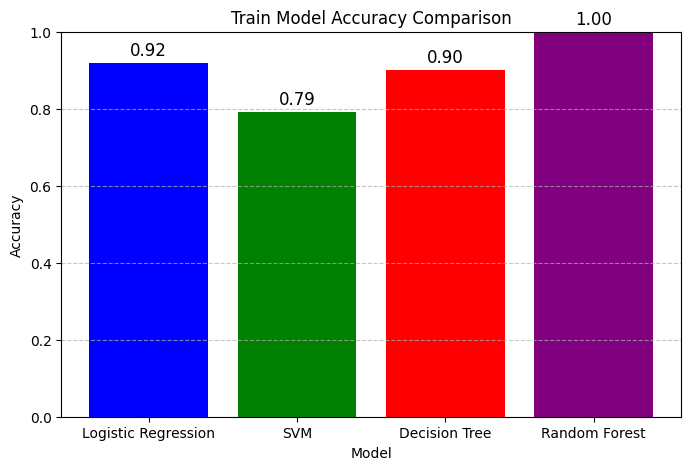

In [133]:
models = ["Logistic Regression", "SVM", "Decision Tree", "Random Forest"]
accuracies = [log_accuracy, SV_accuracy, DT_accuracy, RF_Train_accuracy]

# Plot the accuracy comparison
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Train Model Accuracy Comparison")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the accuracy values on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)

plt.show()

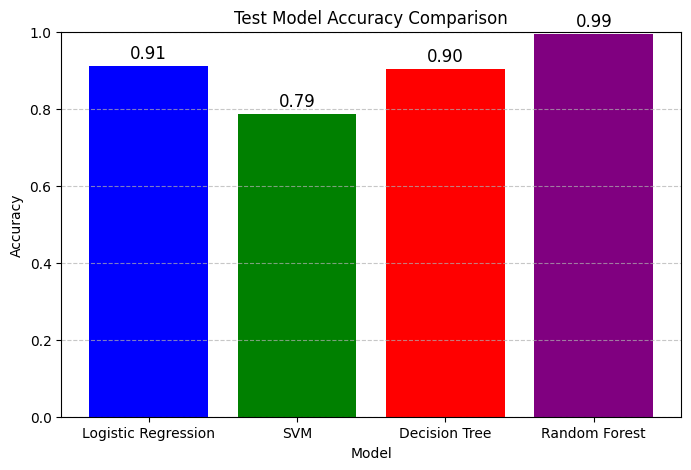

In [135]:
models = ["Logistic Regression", "SVM", "Decision Tree", "Random Forest"]
accuracies = [log_accuracy_test, SV_accuracy_test, DT_accuracy_test, RF_Test_accuracy]

# Plot the accuracy comparison
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Test Model Accuracy Comparison")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the accuracy values on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)

plt.show()

In [154]:
X_1 = df_1.drop(columns = 'selling_price' )
y_1 = df_1['selling_price']

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X_1,y_1 , test_size= 0.2, random_state = 42)

In [158]:
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [159]:
y_test_pred = linear.predict(X_test)

In [160]:
linear_MSE = mean_squared_error(y_test, y_test_pred)
linear_MAE = mean_absolute_error(y_test, y_test_pred)
linear_R2 = r2_score(y_test, y_test_pred)

In [169]:
print(f'Mean squared error value for test model : {linear_MSE}')
print(f'Mean absolute error value for test model : {linear_MAE}')
print(f'R2 value for test model : {linear_R2}')

Mean squared error value for test model : 234316573133.06647
Mean absolute error value for test model : 274495.6017530192
R2 value for test model : 0.6883399560361847


In [162]:
y_train_pred = linear.predict(X_train)

In [164]:
linear_MSE_train = mean_squared_error(y_train, y_train_pred)
linear_MAE_train = mean_absolute_error(y_train, y_train_pred)
linear_R2_train = r2_score(y_train, y_train_pred)

In [167]:
print(f'Mean squared error value  for training model: {linear_MSE_train}')
print(f'Mean absolute error value  for training model: {linear_MAE_train}')
print(f'R2 value  for training model: {linear_R2_train}')

Mean squared error value  for training model: 200305299148.43048
Mean absolute error value  for training model: 270017.3175543832
R2 value  for training model: 0.6829430848286884


In [ ]:

# MSE represents the average squared difference between actual and predicted values.
# Large values indicate a higher error in prediction.
# MAE is the average absolute difference between actual and predicted values.
# 0.688 (≈ 69%) means the model explains 69% of the variance in the target variable.
# This is decent but not excellent—there's still 31% unexplained variance, which means the model can be improved.

In [171]:
comparison_df = pd.DataFrame({
    'Actual': y_train,        # Y train actual
    'Predicted': y_train_pred #X_train predicted
})

In [172]:
print(comparison_df.head())

      Actual     Predicted
2430  170000 -7.063082e+04
6416   65000 -4.843812e+05
4572  229999  7.310133e+05
3260  880000  1.094525e+06
3560  490000  6.261011e+05


In [174]:
comparison_Test_df = pd.DataFrame({
    'Actual': y_test,        # Y train actual
    'Predicted': y_test_pred #X_train predicted
})

In [176]:
print(comparison_Test_df.head())

      Actual     Predicted
7497  275000  4.218006e+05
4171  400000  8.560149e+05
3069  320000  2.428232e+05
3841  650000  1.010058e+06
322   520000  6.052644e+05
